In [1]:
using CSV
using DataFrames
using DataFramesMeta
using Statistics
using Distributions

In [2]:
adata = CSV.read("data_last_all.tsv", DataFrame);

In [3]:
using Plots

In [4]:
plot(log.(adata[:, :p_mut]), adata[:, :p_inf], adata[:, :n_inf_n]./5000, seriestype=:scatter)

In [5]:
dg = groupby(adata, [:p_mut, :p_inf]);

In [6]:
mean_dg = combine(dg, :n_inf_n => mean) |> sort
max_dg = combine(dg, :n_inf_n => maximum) |> sort
mean_r_dg = combine(dg, :n_rec_n => mean) |> sort
max_r_dg = combine(dg, :n_rec_n => maximum) |> sort
CSV.write("data_mean.tsv", mean_dg, delim="\t")
CSV.write("data_max.tsv", max_dg, delim="\t")

"data_max.tsv"

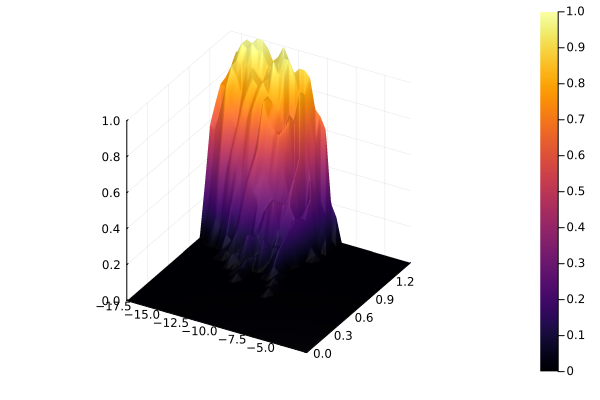

In [7]:
plot(log.(mean_dg[:, 1]), mean_dg[:, 2].*15 ./0.1, mean_dg[:,3]./5000, seriestype=:surface)

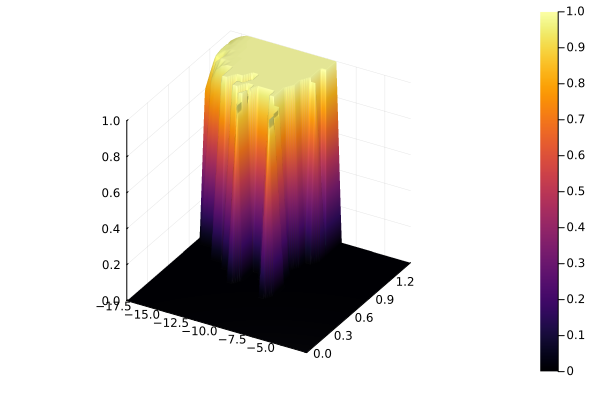

In [8]:
plot(log.(max_dg[:, 1]), max_dg[:, 2].*15 ./0.1, max_dg[:,3]./5000, seriestype=:surface)

In [9]:
surf_max = reshape(max_dg[:,3], 21, :)./5000
surf_max_r = reshape(max_r_dg[:,3], 21, :)./5000;

In [10]:
surf_mean = reshape(mean_dg[:,3], 21, :)./5000
surf_mean_r = reshape(mean_r_dg[:,3], 21, :)./5000;

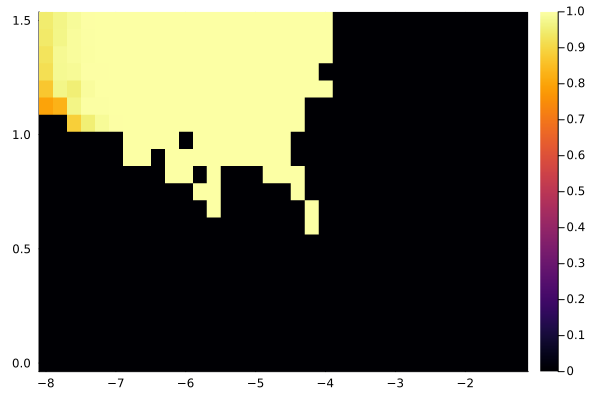

In [11]:
heatmap([i/5-8 for i in 0:34], [i*15/0.1 for i in 0:0.0005:0.01], surf_max)

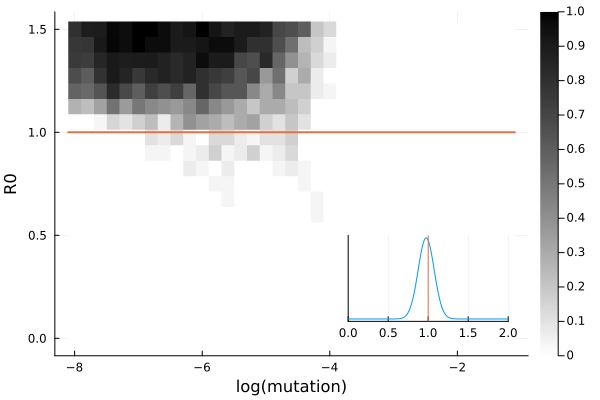

In [12]:
heatmap([i/5-8 for i in 0:34], [i*15/0.1 for i in 0:0.0005:0.01], surf_mean, c=:grayC, xlabel="log(mutation)", ylabel="R0")
plot!((x)->1.0, lw=2, label="")
p=plot!(x->pdf(Normal(0.975, 0.1),x), inset=(1, bbox(0.15, 0.1, 0.3, 0.25, :bottom, :right)), 
    xlims=(0,2), subplot=2, label="", yticks=nothing)
vline!([NaN 1 NaN], label="")

In [13]:
savefig("phasediag_0.975.pdf")

"/home/martin/Science/glasgow/runs/covid_zhang_etal/005_runs_bias_0.97/phasediag_0.975.pdf"

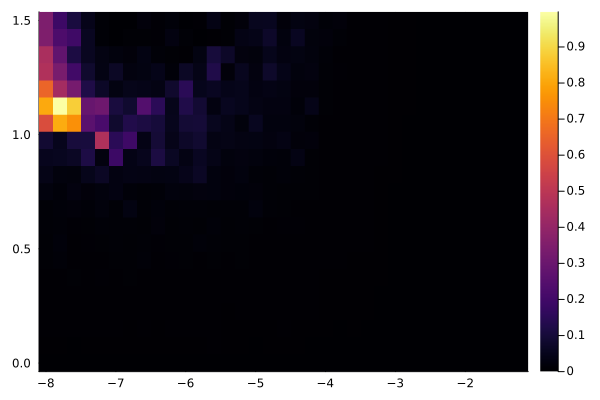

In [14]:
heatmap([i/5-8 for i in 0:34], [i*15/0.1 for i in 0:0.0005:0.01], surf_max_r)

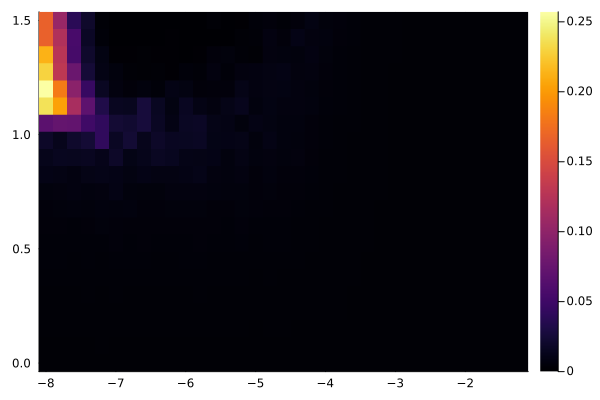

In [15]:
heatmap([i/5-8 for i in 0:34], [i*15/0.1 for i in 0:0.0005:0.01], surf_mean_r)